In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import datasets
!pip install catboost 
from sklearn.model_selection import RepeatedKFold
import lightgbm as lgb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [59]:
print(train.shape)
print(test.shape)

(7165, 11)
(3530, 10)


In [60]:


ID = test['ID']
test=test.drop(['ID'], axis=1)
train=train.drop(['ID'], axis=1)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,Yes,33,No,Engineer,0.0,Average,2.0,Cat_6,B
1,Female,No,42,Yes,Doctor,5.0,Low,1.0,Cat_6,B
2,Male,Yes,80,No,Executive,0.0,High,2.0,Cat_6,A
3,Female,Yes,66,Yes,Artist,0.0,Average,3.0,Cat_6,C
4,Female,Yes,39,Yes,Healthcare,8.0,High,2.0,Cat_1,D


# Preprocessing

In [61]:
print("train:",train.isnull().sum())
print("------------------")
print("test:",test.isnull().sum())

train: Gender               0
Ever_Married       121
Age                  0
Graduated           69
Profession         105
Work_Experience    725
Spending_Score       0
Family_Size        301
Var_1               64
Segmentation         0
dtype: int64
------------------
test: Gender               0
Ever_Married        69
Age                  0
Graduated           33
Profession          57
Work_Experience    373
Spending_Score       0
Family_Size        147
Var_1               44
dtype: int64


In [62]:
train.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [63]:
print("train:",train.describe())
print("------------------")
print("test:",test.describe())

train:                Age  Work_Experience  Family_Size
count  7165.000000      6440.000000  6864.000000
mean     43.623308         2.610559     2.834062
std      16.842847         3.387930     1.538093
min      18.000000         0.000000     1.000000
25%      30.000000         0.000000     2.000000
50%      41.000000         1.000000     2.000000
75%      53.000000         4.000000     4.000000
max      89.000000        14.000000     9.000000
------------------
test:                Age  Work_Experience  Family_Size
count  3530.000000      3157.000000  3383.000000
mean     43.285552         2.638581     2.864322
std      16.633943         3.397075     1.533070
min      18.000000         0.000000     1.000000
25%      30.000000         0.000000     2.000000
50%      41.000000         1.000000     3.000000
75%      52.000000         4.000000     4.000000
max      89.000000        14.000000     9.000000


In [64]:
print("train:",train.shape)
print("------------------")
print("test:",test.shape)

train: (7165, 10)
------------------
test: (3530, 9)


In [65]:
train['Profession'].unique()

array(['Engineer', 'Doctor', 'Executive', 'Artist', 'Healthcare',
       'Entertainment', 'Marketing', 'Lawyer', 'Homemaker', nan],
      dtype=object)

In [66]:
test['Profession'].unique()

array(['Engineer', 'Healthcare', 'Artist', 'Lawyer', 'Executive',
       'Entertainment', 'Homemaker', 'Doctor', 'Marketing', nan],
      dtype=object)

In [67]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,37,No,Engineer,1.0,Average,6.0,Cat_4
1,Female,No,21,No,Healthcare,2.0,Low,3.0,Cat_6
2,Male,No,38,Yes,Artist,NaN,Low,1.0,Cat_6
3,Male,No,26,Yes,Healthcare,0.0,Low,2.0,Cat_3
4,Male,Yes,68,Yes,Lawyer,0.0,Low,2.0,NaN
...,...,...,...,...,...,...,...,...,...
3525,Male,Yes,79,Yes,Artist,NaN,High,2.0,Cat_6
3526,Male,Yes,40,Yes,Entertainment,1.0,Average,2.0,Cat_3
3527,Male,Yes,73,Yes,Artist,5.0,High,3.0,Cat_6
3528,Male,No,20,No,Healthcare,NaN,Low,5.0,Cat_3


In [68]:
train.isnull().sum()

Gender               0
Ever_Married       121
Age                  0
Graduated           69
Profession         105
Work_Experience    725
Spending_Score       0
Family_Size        301
Var_1               64
Segmentation         0
dtype: int64

In [69]:
test.isnull().sum()

Gender               0
Ever_Married        69
Age                  0
Graduated           33
Profession          57
Work_Experience    373
Spending_Score       0
Family_Size        147
Var_1               44
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

train['Spending_Score'] = le.fit_transform(train['Spending_Score'])#ordinal
test['Spending_Score'] = le.fit_transform(test['Spending_Score'])

train['Gender'] = le.fit_transform(train['Gender'])
test['Gender'] = le.fit_transform(test['Gender'])

train['Graduated'] = le.fit_transform(train['Graduated'])
test['Graduated'] = le.fit_transform(test['Graduated'])

train['Ever_Married'] = le.fit_transform(train['Ever_Married'])
test['Ever_Married'] = le.fit_transform(test['Ever_Married'])

train['Segmentation'] = le.fit_transform(train['Segmentation'])


In [71]:
train=pd.concat((pd.get_dummies(train['Profession'] ),train),axis=1)
del train['Profession']

test=pd.concat((pd.get_dummies(test['Profession'] ),test),axis=1)
del test['Profession']


In [72]:
train=pd.concat((pd.get_dummies(train['Var_1'] ),train),axis=1)
del train['Var_1']

test=pd.concat((pd.get_dummies(test['Var_1'] ),test),axis=1)
del test['Var_1']

In [73]:
train

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Artist,Doctor,Engineer,...,Lawyer,Marketing,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,33,0,0.0,0,2.0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,42,1,5.0,2,1.0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,80,0,0.0,1,2.0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,66,1,0.0,0,3.0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,39,1,8.0,1,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,0,0,0,0,0,1,0,1,0,0,...,0,0,1,1,42,1,0.0,0,5.0,2
7161,0,0,0,0,0,1,0,1,0,0,...,0,0,1,1,48,1,0.0,0,2.0,2
7162,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,51,1,8.0,0,2.0,2
7163,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,25,0,2.0,2,2.0,0


In [74]:
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# imputer.fit(train)


# train= imputer.transform(train)
# imputer.fit(test)
# test= imputer.transform(test)
# X_train =train[:,0:train.shape[1]-1]
# Xx_test = test
# y_train = train[:,train.shape[1]-1]


!pip install fancyimpute
from fancyimpute import KNN
train_x = pd.DataFrame(KNN(k = 3).fit_transform(train), columns = train.columns)
test_x = pd.DataFrame(KNN(k = 3).fit_transform(test), columns = test.columns)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Imputing row 1/7165 with 0 missing, elapsed time: 17.694
Imputing row 101/7165 with 0 missing, elapsed time: 17.697
Imputing row 201/7165 with 0 missing, elapsed time: 17.698
Imputing row 301/7165 with 1 missing, elapsed time: 17.700
Imputing row 401/7165 with 0 missing, elapsed time: 17.701
Imputing row 501/7165 with 0 missing, elapsed time: 17.703
Imputing row 601/7165 with 0 missing, elapsed time: 17.706
Imputing row 701/7165 with 0 missing, elapsed time: 17.707
Imputing row 801/7165 with 0 missing, elapsed time: 17.709
Imputing row 901/7165 with 0 missing, elapsed time: 17.711
Imputing row 1001/7165 with 0 missing, elapsed time: 17.713
Imputing row 1101/7165 with 1 missing, elapsed time: 17.715
Imputing row 1201/7165 with 0 missing, elapsed time: 17.717
Imputing row 1301/7165 with 1 missing, elapsed time: 17.719
Imputing row 1401/7165 with 0 missing, elapsed time: 17.721
Imputing row 

In [75]:

train.isnull().sum()

Cat_1                0
Cat_2                0
Cat_3                0
Cat_4                0
Cat_5                0
Cat_6                0
Cat_7                0
Artist               0
Doctor               0
Engineer             0
Entertainment        0
Executive            0
Healthcare           0
Homemaker            0
Lawyer               0
Marketing            0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Work_Experience    725
Spending_Score       0
Family_Size        301
Segmentation         0
dtype: int64

In [76]:
numeric_var = ['Segmentation','Age', 'Work_Experience', 'Family_Size', 'Spending_Score']
Data_Day_cor = train.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()

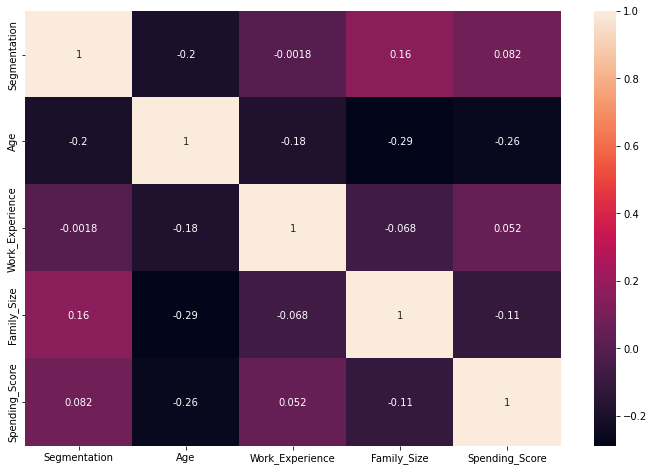

In [77]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(correlation_result,annot=True)

In [78]:
X_train=train.drop(['Segmentation','Work_Experience'],axis=1)
Xx_test=test.drop(['Work_Experience'],axis=1)
y_train=train['Segmentation']

In [79]:
X_train_x=train_x.drop(['Segmentation','Work_Experience'],axis=1)
Xx_test_x=test_x.drop(['Work_Experience'],axis=1)
y_train_x=train_x['Segmentation']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [81]:
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_train_x, y_train_x, test_size = 0.2, random_state=42)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [83]:
classifiers = [ ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train_x, y_train_x.ravel())
    predictions = classifier.predict(X_test_x)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

ExtraTreesClassifier : 0.36985345429169575
DecisionTree : 0.35519888346127004
RandomForest : 0.377529658060014
AdaBoostClassifier : 0.45638520586182835
GradientBoostingClassifier:  0.479413817166783
XGB : 0.47592463363572923
CatBoost : 0.4466154919748779


In [28]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[500,100],
    "max_depth":[5,7,9],
    "learning_rate":[0.01,0.1]
}
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(gbc,parameters,cv=10)
cv.fit(X_train_x,y_train_x)
grad_sumit=cv.predict(Xx_test)


KeyboardInterrupt: ignored

In [ ]:
print("gsearch1.best_score_",cv.best_score_)

In [ ]:
gred=GradientBoostingClassifier(n_estimators= 75)

In [ ]:
gred.fit(X_train,y_train)
pred = gred.predict(X_test)
from sklearn.metrics import accuracy_score

print("Val Acc:",   accuracy_score(pred,   y_test))

In [ ]:
predgred = gred.predict(Xx_test)

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)

In [ ]:
grad_=cv.predict(X_test)

In [ ]:
cm = confusion_matrix(grad_,y_test)

In [ ]:
cm

In [ ]:
# from catboost import CatBoostClassifier, Pool
# import catboost as cb
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# model = CatBoostClassifier(iterations=200)

# model.fit(X_train,y_train)
# preds_class = model.predict(X_test)


In [ ]:
# from catboost import CatBoostClassifier, Pool
# import catboost as cb
# model = CatBoost()

# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_result = model.grid_search(grid, 
#                                        X=X_train, 
#                                        y=y_train, 
#                                        plot=True)

### CatBoost

In [84]:

import catboost as cb
from catboost import CatBoostClassifier, Pool





In [ ]:
params = {'depth':[6,8,9,10],
        'iterations':[250,100],

        'max_ctr_complexity':[3,4,5] }


model = CatBoostClassifier()

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10, n_jobs=-1)


In [ ]:
grid.fit(X_train, y_train)
print("gsearch1.best_params_",grid.best_params_)
print("gsearch1.best_score_",grid.best_score_)

0:	learn: 1.3741700	total: 4.5ms	remaining: 895ms
1:	learn: 1.3635306	total: 9.39ms	remaining: 930ms
2:	learn: 1.3535931	total: 13.6ms	remaining: 895ms
3:	learn: 1.3465196	total: 17.1ms	remaining: 837ms
4:	learn: 1.3384106	total: 20.7ms	remaining: 808ms
5:	learn: 1.3302308	total: 24.9ms	remaining: 804ms
6:	learn: 1.3231837	total: 28.7ms	remaining: 793ms
7:	learn: 1.3157963	total: 32.7ms	remaining: 785ms
8:	learn: 1.3090870	total: 36.8ms	remaining: 782ms
9:	learn: 1.3026361	total: 40.8ms	remaining: 775ms
10:	learn: 1.2962554	total: 44.8ms	remaining: 770ms
11:	learn: 1.2902406	total: 48.9ms	remaining: 766ms
12:	learn: 1.2846411	total: 53ms	remaining: 762ms
13:	learn: 1.2793765	total: 56.9ms	remaining: 757ms
14:	learn: 1.2739253	total: 60.9ms	remaining: 752ms
15:	learn: 1.2697513	total: 64.9ms	remaining: 747ms
16:	learn: 1.2651699	total: 69ms	remaining: 743ms
17:	learn: 1.2603955	total: 73.2ms	remaining: 740ms
18:	learn: 1.2563573	total: 77.3ms	remaining: 736ms
19:	learn: 1.2523230	total:

In [85]:
import catboost as cb
catmodel=cb.CatBoostClassifier(depth=6,n_estimators =200,l2_leaf_reg=0.5,learning_rate= 0.03)
catmodel.fit(X_train,y_train)

0:	learn: 1.3750078	total: 11.1ms	remaining: 2.2s
1:	learn: 1.3651379	total: 25.5ms	remaining: 2.52s
2:	learn: 1.3549892	total: 38.2ms	remaining: 2.51s
3:	learn: 1.3453837	total: 59.4ms	remaining: 2.91s
4:	learn: 1.3366286	total: 70.9ms	remaining: 2.76s
5:	learn: 1.3280311	total: 81.8ms	remaining: 2.65s
6:	learn: 1.3201534	total: 95.7ms	remaining: 2.64s
7:	learn: 1.3123576	total: 110ms	remaining: 2.63s
8:	learn: 1.3057190	total: 123ms	remaining: 2.61s
9:	learn: 1.3002749	total: 136ms	remaining: 2.59s
10:	learn: 1.2939288	total: 148ms	remaining: 2.54s
11:	learn: 1.2886841	total: 159ms	remaining: 2.49s
12:	learn: 1.2829927	total: 171ms	remaining: 2.46s
13:	learn: 1.2776104	total: 185ms	remaining: 2.46s
14:	learn: 1.2722525	total: 192ms	remaining: 2.37s
15:	learn: 1.2677324	total: 208ms	remaining: 2.4s
16:	learn: 1.2634132	total: 224ms	remaining: 2.41s
17:	learn: 1.2589990	total: 236ms	remaining: 2.38s
18:	learn: 1.2547529	total: 248ms	remaining: 2.37s
19:	learn: 1.2507051	total: 257ms	re

In [86]:
preds_cat = catmodel.predict(X_test)
# catmodel.best_svc.best_params_
from sklearn.metrics import accuracy_score
print("Val Acc:",   accuracy_score(preds_cat,   y_test))

Val Acc: 0.4961618981158409


In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
cm = confusion_matrix(preds_cat,y_test)

cm

array([[182, 104,  56,  92],
       [ 57,  90,  39,  26],
       [ 55, 104, 174,  24],
       [ 78,  50,  37, 265]])

In [88]:
preds_cat_submit = catmodel.predict(Xx_test)

In [89]:
cm
#48 accuracy

array([[182, 104,  56,  92],
       [ 57,  90,  39,  26],
       [ 55, 104, 174,  24],
       [ 78,  50,  37, 265]])

In [90]:
preds_sub = catmodel.predict(Xx_test)

### LGBM

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
#Define the scoring
clf=GridSearchCV(lgb,parameters,scoring='accuracy')
clf.fit(X=X_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))



In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
                                   boosting_type='gbdt', 
                                   max_depth=20, 
                                   learning_rate=0.15, 
                                   objective='multiclass', # Multi Class Classification
                                   random_state=100,  
                                   n_estimators=200 ,
                                   reg_alpha=0, 
                                   reg_lambda=1, 
                                   n_jobs=-1
                                 )
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cat = cross_val_score(lgb_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# CV: 1
from sklearn.model_selection import StratifiedKFold, KFold
from lightgbm import LGBMClassifier
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
scores = list()
for train, test in kfold.split():
    x_train, x_test = df_train_dum.iloc[train], df_train_dum.iloc[test]
    y_train, y_test = Y[train], Y[test]
    
    model = LGBMClassifier(random_state=100, max_depth=3, n_estimators=200, learning_rate=0.1)
    model.fit(x_train, y_train, categorical_feature=cat_feats_inds)
    preds = model.predict(x_test)
    
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
first_fold = sum(scores)/len(scores)
print("\nAverage Score: ", first_fold, "\n\n")

# CV: 2
kfold = StratifiedKFold(n_splits=10, random_state=27, shuffle=True)
scores = list()
for train, test in kfold.split(df_train_dum, Y):
    x_train, x_test = df_train_dum.iloc[train], df_train_dum.iloc[test]
    y_train, y_test = Y[train], Y[test]
    
    model = LGBMClassifier(random_state=100, max_depth=3, n_estimators=200, learning_rate=0.1)
    model.fit(x_train, y_train, categorical_feature=cat_feats_inds)
    preds = model.predict(x_test)
    
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
    
second_fold = sum(scores)/len(scores)
print("\nAverage Score: ", second_fold)
print("\n\nFinal Average: ", first_fold*0.5 + second_fold*0.5)

In [91]:
#kaggle
lgb_model = lgb.LGBMClassifier(
                                   boosting_type='gbdt', 
                                   max_depth=15, 
                                   learning_rate=0.15, 
                                   objective='multiclass', # Multi Class Classification
                                   random_state=100,  
                                   n_estimators=100 ,
                                   reg_alpha=0, 
                                   reg_lambda=1, 
                                   n_jobs=-1
                                 )

In [92]:
lgb_model.fit(X=X_train, y=y_train)


LGBMClassifier(learning_rate=0.15, max_depth=15, objective='multiclass',
               random_state=100, reg_alpha=0, reg_lambda=1)

In [93]:
preds_lgbm = lgb_model.predict(Xx_test)

In [94]:
preds_lgbm_t = lgb_model.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
cm = confusion_matrix(preds_lgbm_t,y_test)

In [96]:
cm

array([[155, 106,  56,  89],
       [ 62,  82,  46,  29],
       [ 56, 104, 161,  29],
       [ 99,  56,  43, 260]])

In [97]:
accuracy_score(y_test, preds_lgbm_t)

0.45917655268667135

### ExtraTree

In [98]:
# from sklearn.ensemble import ExtraTreesClassifier
# xtra_tree= ExtraTreesClassifier(n_estimators = 5,
#                                         criterion ='entropy', max_features = 2)
  
# # Training the model
# xtra_tree.fit(X_train, y_train)
  
# # Computing the importance of each feature
# feature_importance = xtra_tree.feature_importances_
  
# # Normalizing the individual importances
# feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
#                                         xtra_tree.estimators_],
#                                         axis = 0)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

clf = ExtraTreesClassifier(n_estimators=500, random_state=0)
clf.fit(X_train_x, y_train_x)
#ExtraTreesClassifier(random_state=0)

ExtraTreesClassifier(n_estimators=500, random_state=0)

In [49]:
y_train.shape
xtree=clf.predict(X_test_x)

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
cm = confusion_matrix(xtree,y_test)
cm

array([[130, 101,  68,  95],
       [ 95,  85,  96,  47],
       [ 59, 105,  99,  53],
       [ 88,  57,  43, 212]])

### XGBoost

In [ ]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

modelXg = XGBClassifier()       
gs = GridSearchCV(estimator=modelXg, param_grid = parameters, cv = 10, n_jobs=-1)
gs.fit(X_train, y_train)
print("gsearch1.best_params_",gs.best_params_)
print("gsearch1.best_score_",gs.best_score_)

In [100]:
modelXg = XGBClassifier(
                        learning_rate=0.011, n_estimators=500, max_depth=5,min_child_weight=100,
                        nthread=-1, subsample=0.8, colsample_bytree=0.7, scoring = 'accuracy',seed=7)
modelXg.fit(X_train, y_train)
predXg=modelXg.predict(X_test)
accuracy_score(y_test, predXg)

0.4856943475226797

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
cm = confusion_matrix(predXg,y_test)
cm

array([[188, 112,  55, 104],
       [ 44,  74,  37,  18],
       [ 62, 110, 176,  27],
       [ 78,  52,  38, 258]])

In [102]:
predxg_submit = modelXg.predict(Xx_test)

### Voting

In [103]:
from sklearn.ensemble import VotingClassifier


classifiers = [ ['XGB :', modelXg],
               ['CatBoost :',catmodel ]]
vc = VotingClassifier(estimators=classifiers,voting='soft')

vc.fit(X_train,y_train)

y_pred_voting = vc.predict(X_test)



0:	learn: 1.3750078	total: 5.14ms	remaining: 1.02s
1:	learn: 1.3651379	total: 10.1ms	remaining: 1s
2:	learn: 1.3549892	total: 14.3ms	remaining: 939ms
3:	learn: 1.3453837	total: 18.5ms	remaining: 906ms
4:	learn: 1.3366286	total: 22.7ms	remaining: 884ms
5:	learn: 1.3280311	total: 26.6ms	remaining: 860ms
6:	learn: 1.3201534	total: 30.8ms	remaining: 850ms
7:	learn: 1.3123576	total: 35.1ms	remaining: 842ms
8:	learn: 1.3057190	total: 39.3ms	remaining: 835ms
9:	learn: 1.3002749	total: 43.2ms	remaining: 821ms
10:	learn: 1.2939288	total: 47.3ms	remaining: 812ms
11:	learn: 1.2886841	total: 51.7ms	remaining: 810ms
12:	learn: 1.2829927	total: 55.8ms	remaining: 803ms
13:	learn: 1.2776104	total: 60ms	remaining: 797ms
14:	learn: 1.2722525	total: 64.1ms	remaining: 791ms
15:	learn: 1.2677324	total: 68.3ms	remaining: 785ms
16:	learn: 1.2634132	total: 72.3ms	remaining: 779ms
17:	learn: 1.2589990	total: 76.5ms	remaining: 774ms
18:	learn: 1.2547529	total: 80.7ms	remaining: 769ms
19:	learn: 1.2507051	total:

In [107]:
y_pred_voting = vc.predict(X_test_x)

In [108]:
accuracy_score(y_test_x, y_pred_voting)

0.4926727145847872

In [109]:
pre =preds_cat_submit
pre = pd.DataFrame(pre)
pre=pre.replace(0,'A')
pre=pre.replace(1,'B')
pre=pre.replace(2,'C')
pre=pre.replace(3,'D')

In [ ]:
pre[0]

In [ ]:
submission

In [110]:
submission = {'ID':ID,'Segmentation':pre[0]}
submission = pd.DataFrame(submission)
submission.to_csv("Submission_cat_filltrain_final", index=False)

In [ ]:
raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv('test.csv')

In [ ]:
raw_train.columns


Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
raw_test.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [ ]:
pre

,0
0,A
1,D
2,A
3,D
4,A
...,...
3525,C
3526,B
3527,C
3528,D


In [ ]:

raw_test.insert(1,column ='Segmentation',value = pre[0])

In [ ]:
raw_test.columns

Index(['ID', 'Segmentation', 'Gender', 'Ever_Married', 'Age', 'Graduated',
       'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size',
       'Var_1'],
      dtype='object')

In [ ]:
raw_train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:

full = pd.concat((raw_train,raw_test),axis =0)


In [ ]:
full.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3525,4323,Male,Yes,79,Yes,Artist,NaN,High,2.0,Cat_6,C
3526,3776,Male,Yes,40,Yes,Entertainment,1.0,Average,2.0,Cat_3,B
3527,6697,Male,Yes,73,Yes,Artist,5.0,High,3.0,Cat_6,C
3528,3431,Male,No,20,No,Healthcare,NaN,Low,5.0,Cat_3,D
3529,7734,Male,Yes,58,Yes,Doctor,1.0,High,2.0,Cat_6,C


In [ ]:
new_train = pd.DataFrame(full)
new_train.to_csv("train", index=False)